### 0. 사용할 패키지 불러오기

In [1]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
%matplotlib inline

def create_dataset(signal_data, look_back=1):
    dataX, dataY = [], []
    for i in range(len(signal_data)-look_back):
        dataX.append(signal_data[i:(i+look_back), 0])
        dataY.append(signal_data[i+look_back, 0])
    return np.array(dataX), np.array(dataY)

look_back = 40

Using TensorFlow backend.


### 1. 데이터 생성하기

In [25]:
signal_data = np.cos(np.arange(1600)*(20*np.pi/1000))[:,None]

# 데이터 전처리
scaler = MinMaxScaler(feature_range=(0, 1))
signal_data = scaler.fit_transform(signal_data)

# 데이터 분리
train = signal_data[0:800]
val = signal_data[800:1200]
test = signal_data[1200:]

# 데이터셋 생성
x_train, y_train = create_dataset(train, look_back)
x_val, y_val = create_dataset(val, look_back)
x_test, y_test = create_dataset(test, look_back)

# 데이터셋 전처리
# 전처리 전과 후의 변화가 없음..?
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_val = np.reshape(x_val, (x_val.shape[0], x_val.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

x_train = np.squeeze(x_train)
x_val = np.squeeze(x_val)
x_test = np.squeeze(x_test)

### 2. 모델 구성하기

In [26]:
model = Sequential()
model.add(Dense(32, input_dim=40, activation="relu"))
model.add(Dropout(0.3))
for i in range(2):
    model.add(Dense(32, activation="relu"))
    model.add(Dropout(0.3))
model.add(Dense(1))

### 3. 모델 학습과정 설정하기

In [27]:
model.compile(loss='mean_squared_error', optimizer='adagrad')

### 4. 모델 학습시키기

In [29]:
hist = model.fit(x_train, y_train, epochs=200, batch_size=32, validation_data = (x_val, y_val))

Train on 760 samples, validate on 360 samples
Epoch 1/200
760/760 [==============================] - 1s 2ms/step - loss: 0.0887 - val_loss: 0.0141
Epoch 2/200
760/760 [==============================] - 0s 132us/step - loss: 0.0370 - val_loss: 0.0128
Epoch 3/200
760/760 [==============================] - 0s 121us/step - loss: 0.0360 - val_loss: 0.0197
Epoch 4/200
760/760 [==============================] - 0s 117us/step - loss: 0.0323 - val_loss: 0.0176
Epoch 5/200
760/760 [==============================] - 0s 113us/step - loss: 0.0276 - val_loss: 0.0317
Epoch 6/200
760/760 [==============================] - 0s 120us/step - loss: 0.0268 - val_loss: 0.0133
Epoch 7/200
760/760 [==============================] - 0s 113us/step - loss: 0.0237 - val_loss: 0.0184
Epoch 8/200
760/760 [==============================] - 0s 109us/step - loss: 0.0253 - val_loss: 0.0263
Epoch 9/200
760/760 [==============================] - 0s 109us/step - loss: 0.0230 - val_loss: 0.0148
Epoch 10/200
760/760 [=======

### 5. 학습과정 살펴보기

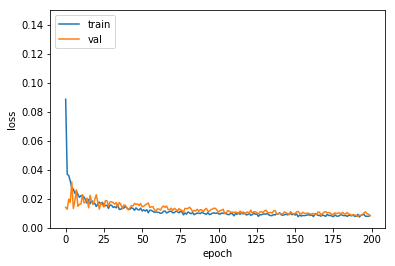

In [30]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.ylim(0.0, 0.15)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

### 6. 모델 평가하기

In [31]:
trainScore = model.evaluate(x_train, y_train, verbose=0)
print('Train Score: ', trainScore)
valScore = model.evaluate(x_val, y_val, verbose=0)
print('Validation Score: ', valScore)
testScore = model.evaluate(x_test, y_test, verbose=0)
print('Test Score: ', testScore)

Train Score:  0.00835671857685635
Validation Score:  0.008310743131571346
Test Score:  0.008310743131571346


### 7. 모델 사용하기

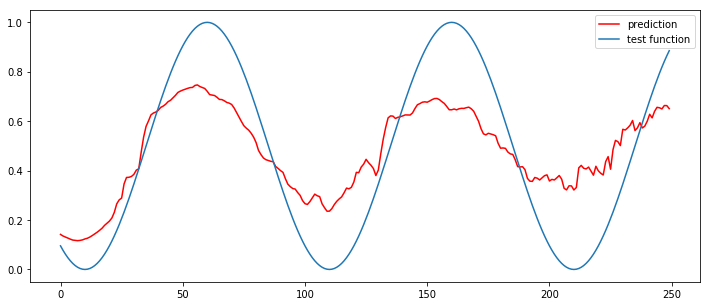

In [35]:
look_ahead = 250
xhat = x_test[0, None]
predictions = np.zeros((look_ahead, 1))
for i in range(look_ahead):
    prediction = model.predict(xhat, batch_size=32)
    predictions[i] = prediction
    xhat = np.hstack([xhat[:,1:], prediction])

plt.figure(figsize=(12,5))
plt.plot(np.arange(look_ahead), predictions, 'r', label="prediction")
plt.plot(np.arange(look_ahead), y_test[:look_ahead], label="test function")
plt.legend()
plt.show()